<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the dataset.</li>
<li>Make different visualizations.</li>
<li>
Extract information based on the visual representation of the database.</li>

</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/karangadiya/fifa19
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # Import all modules that are required
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
# Setting up 'requests' to make HTTPS requests properly takes some extra steps... we'll skip them for now.
requests.packages.urllib3.disable_warnings()
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# <font color = 'Orange'> Read your Dataset (.csv) </font>

In [ ]:
# Според бројот на индекс 185043 % 10 = 3, со тоа го земам за обработка третото податочно множество
sample_submission =  pd.read_csv('/content/drive/MyDrive/Data_Science-Datasets/dataset_3/sample_submission.csv')

In [ ]:
sample_submission

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [ ]:
test_dataset = pd.read_csv('/content/drive/MyDrive/Data_Science-Datasets/dataset_3/test.csv')

In [ ]:
test_dataset

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/Data_Science-Datasets/dataset_3/train.csv')

In [ ]:
train_dataset

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


**Show info and the first 5 rows of your Dataset**



In [ ]:
# info from the datasets
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   id        127037 non-null  int64
 1   Response  127037 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


In [ ]:
train_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


Showing the first five rows from datasets 

In [ ]:
train_dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
test_dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
sample_submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


# <font color='Orange'>Find statistic elements for the continuous variables</font>
Like mean, median,  standard deviation, minimum, maximum, quantile,geometric mean

In [ ]:
#Mean
print('Mean of train_dataset is: ')
train_dataset.mean()

Mean of train_dataset is: 


id                      190555.000000
Age                         38.822584
Driving_License              0.997869
Region_Code                 26.388807
Previously_Insured           0.458210
Annual_Premium           30564.389581
Policy_Sales_Channel       112.034295
Vintage                    154.347397
Response                     0.122563
dtype: float64

In [ ]:
#Mean
print('Mean of test_dataset is: ')
test_dataset.mean()

Mean of test_dataset is: 


id                      444628.000000
Age                         38.765903
Driving_License              0.998134
Region_Code                 26.459866
Previously_Insured           0.460039
Annual_Premium           30524.643576
Policy_Sales_Channel       111.800468
Vintage                    154.318301
dtype: float64

In [ ]:
#median
print('Median of train_dataset is: ')
train_dataset.median()

Median of train_dataset is: 


id                      190555.0
Age                         36.0
Driving_License              1.0
Region_Code                 28.0
Previously_Insured           0.0
Annual_Premium           31669.0
Policy_Sales_Channel       133.0
Vintage                    154.0
Response                     0.0
dtype: float64

In [ ]:
print('Median of test_dataset is: ')
test_dataset.median()

Median of test_dataset is: 


id                      444628.0
Age                         36.0
Driving_License              1.0
Region_Code                 28.0
Previously_Insured           0.0
Annual_Premium           31642.0
Policy_Sales_Channel       135.0
Vintage                    154.0
dtype: float64

In [ ]:
train_dataset.min()

id                             1
Gender                    Female
Age                           20
Driving_License                0
Region_Code                    0
Previously_Insured             0
Vehicle_Age             1-2 Year
Vehicle_Damage                No
Annual_Premium              2630
Policy_Sales_Channel           1
Vintage                       10
Response                       0
dtype: object

In [ ]:
test_dataset.min()

id                        381110
Gender                    Female
Age                           20
Driving_License                0
Region_Code                    0
Previously_Insured             0
Vehicle_Age             1-2 Year
Vehicle_Damage                No
Annual_Premium              2630
Policy_Sales_Channel           1
Vintage                       10
dtype: object

In [ ]:
train_dataset.max()

id                         381109
Gender                       Male
Age                            85
Driving_License                 1
Region_Code                    52
Previously_Insured              1
Vehicle_Age             > 2 Years
Vehicle_Damage                Yes
Annual_Premium             540165
Policy_Sales_Channel          163
Vintage                       299
Response                        1
dtype: object

In [ ]:
test_dataset.max()

id                         508146
Gender                       Male
Age                            85
Driving_License                 1
Region_Code                    52
Previously_Insured              1
Vehicle_Age             > 2 Years
Vehicle_Damage                Yes
Annual_Premium             472042
Policy_Sales_Channel          163
Vintage                       299
dtype: object

In [ ]:
train_dataset.std()

id                      110016.836208
Age                         15.511611
Driving_License              0.046110
Region_Code                 13.229888
Previously_Insured           0.498251
Annual_Premium           17213.155057
Policy_Sales_Channel        54.203995
Vintage                     83.671304
Response                     0.327936
dtype: float64

In [ ]:
test_dataset.std()

id                      36672.567411
Age                        15.465814
Driving_License             0.043152
Region_Code                13.209916
Previously_Insured          0.498403
Annual_Premium          16945.297103
Policy_Sales_Channel       54.371765
Vintage                    83.661588
dtype: float64

In [ ]:
train_dataset.quantile([.1, .25, .5, .75], axis = 0)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0.10,38111.8,22.0,1.0,8.0,0.0,2630.0,26.0,38.0,0.0
0.25,95278.0,25.0,1.0,15.0,0.0,24405.0,29.0,82.0,0.0
0.50,190555.0,36.0,1.0,28.0,0.0,31669.0,133.0,154.0,0.0
0.75,285832.0,49.0,1.0,35.0,1.0,39400.0,152.0,227.0,0.0


In [ ]:
test_dataset.quantile([.1, .25, .5, .75], axis = 0)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0.10,393813.6,22.0,1.0,8.0,0.0,2630.0,26.0,38.0
0.25,412869.0,25.0,1.0,15.0,0.0,24325.0,26.0,82.0
0.50,444628.0,36.0,1.0,28.0,0.0,31642.0,135.0,154.0
0.75,476387.0,49.0,1.0,35.0,1.0,39408.0,152.0,227.0


In [ ]:
from scipy import stats
#Geometric mean for train_dataset for numeric values 2...5 and 8...12
print('Geometric mean for train_dataset of columns 2,3,4 & 5: ')

stats.gmean(train_dataset.iloc[:,2:6],axis=0)

Geometric mean for train_dataset of columns 2,3,4 & 5: 


array([35.93846762,  0.        ,  0.        ,  0.        ])

In [ ]:
print('Geometric mean from training_set of columns 8,9,10 & 11: ')
stats.gmean(train_dataset.iloc[:,8:12],axis=0)

Geometric mean from training_set of columns 8,9,10 & 11: 


array([22352.54309832,    87.93741516,   123.27770192,     0.        ])

In [ ]:
#Geometric mean for test_dataset for numeric values 2...5 and 8...12
print('Geometric mean for test_dataset of columns 2,3,4 & 5: ')
stats.gmean(test_dataset.iloc[:,2:6],axis=0)

Geometric mean for test_dataset of columns 2,3,4 & 5: 


array([35.89502116,  0.        ,  0.        ,  0.        ])

In [ ]:
print('Geometric mean for test_dataset of columns 8,9 & 10: ')
stats.gmean(test_dataset.iloc[:,8:11],axis=0)

Geometric mean for test_dataset of columns 8,9 & 10: 


array([22336.53759121,    87.60035832,   123.18487495])

# <font color = 'Orange'>Find the frequencies for the categorical variables </font>

In [ ]:
#add your code dataFrame to implement
# There are two variables that include text and
# will be defined as class  as categorical variables for both train and test datasets
train_dataset.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
train_dataset.Gender.value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [ ]:
train_dataset.Vehicle_Damage.value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [ ]:
#for test dataset

In [ ]:
test_dataset.Vehicle_Age.value_counts()

1-2 Year     66699
< 1 Year     55019
> 2 Years     5319
Name: Vehicle_Age, dtype: int64

In [ ]:
test_dataset.Vehicle_Damage.value_counts()

Yes    63835
No     63202
Name: Vehicle_Damage, dtype: int64

In [ ]:
test_dataset.Gender.value_counts()

Male      68236
Female    58801
Name: Gender, dtype: int64

# <font color = 'Orange'>Data visualization </font>

In [ ]:
 # Importing all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt

## <font color = 'Orange'>Find the distribution of given attributes</font>


Which of the attributes(columns) did you choose?


I choosed Vehicle_Damage, Annual_Premium, Vintage, Policy_Sales_Channel

**Make the visualizations using histograms, bar charts, etc.**

([0, 1], <a list of 2 Text major ticklabel objects>)

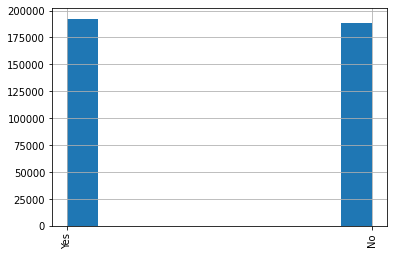

In [ ]:

# For train dataset
train_dataset['Vehicle_Damage'].hist()
plt.xticks(rotation = 90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]), <a list of 8 Text major ticklabel objects>)

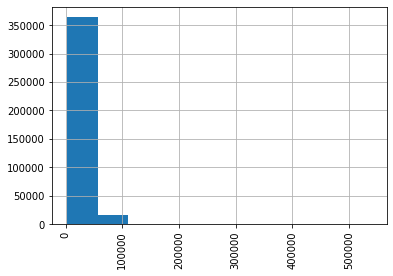

In [ ]:
train_dataset['Annual_Premium'].hist()
plt.xticks(rotation = 90)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text major ticklabel objects>)

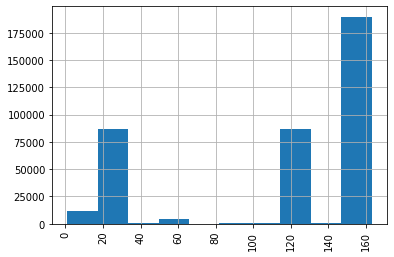

In [ ]:
train_dataset['Policy_Sales_Channel'].hist()
plt.xticks(rotation = 90)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 9 Text major ticklabel objects>)

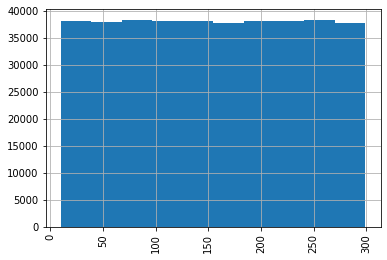

In [ ]:
train_dataset['Vintage'].hist()
plt.xticks(rotation = 90)

([0, 1], <a list of 2 Text major ticklabel objects>)

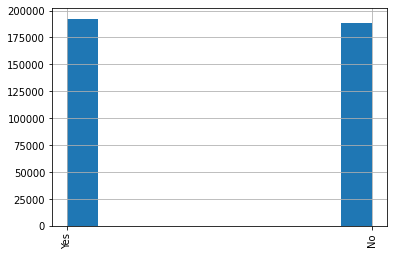

In [ ]:
#For test dataset
train_dataset['Vehicle_Damage'].hist()
plt.xticks(rotation = 90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]), <a list of 7 Text major ticklabel objects>)

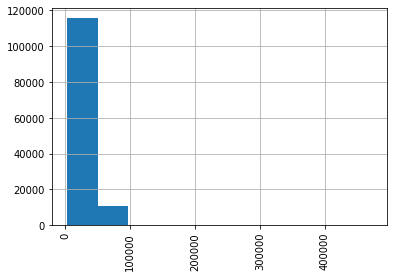

In [ ]:
test_dataset['Annual_Premium'].hist()
plt.xticks(rotation = 90)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text major ticklabel objects>)

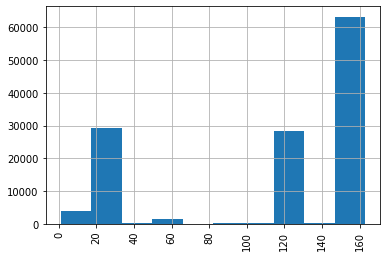

In [ ]:
test_dataset['Policy_Sales_Channel'].hist()
plt.xticks(rotation = 90)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 9 Text major ticklabel objects>)

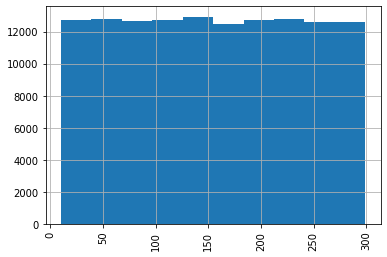

In [ ]:
test_dataset['Vintage'].hist()
plt.xticks(rotation = 90)

Histograms with multiple bins for train and test dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4e6b57d90>,
      dtype=object)

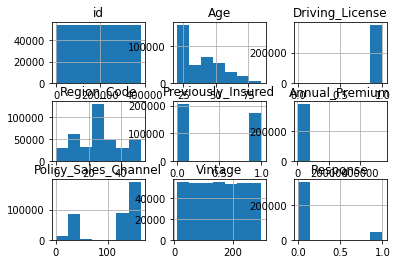

In [ ]:
train_dataset.hist(bins = 7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4e66200d0>,
      dtype=object)

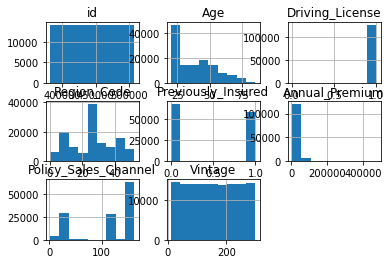

In [ ]:
test_dataset.hist(bins = 9)

In [ ]:
#bar charts

figure = plt.figure()
train1_dataset = train_dataset[['Annual_Premium','Policy_Sales_Channel']].head(10)
train1_dataset.plot.bar(rot=0,figsize=(50,5))
figure.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd4fc6bbb00> (for post_execute):


KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

Error in callback <function flush_figures at 0x7fd4fc6c4170> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
figure = plt.figure()
test1_dataset = test_dataset[['Annual_Premium','Policy_Sales_Channel']].head(10)
test1_dataset.plot.bar(rot=0,figsize=(50,5))
figure.show()

In [ ]:
train1_dataset.plot.bar(stacked=True,figsize=(50,5))

In [ ]:
test1_dataset.plot.bar(stacked=True,figsize=(50,5))

In [ ]:
axes = train1_dataset.plot.bar(rot=0, subplots=True,figsize=(50,5))
axes[1].legend(loc=2)

In [ ]:
axes = test1_dataset.plot.bar(rot=0, subplots=True,figsize=(50,5))
axes[1].legend(loc=2)

## <font color = 'Orange'>Show the trend over time</font>

In [ ]:
train1_dataset.plot.area()

In [ ]:
test1_dataset.plot.area()

## <font color = 'Orange'>Visualize the relationship between the attributes</font>


In [ ]:
Vehicle_Damage, Annual_Premium, Vintage, Policy_Sales_Channel

In [ ]:
fig = plt.figure()
train_ds.plot.scatter(x= 'Annual_Premium', y = 'Policy_Sales_Channel', alpha = 0.75, rot=0)
plt.xticks(rotation=90)

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=[10,10])
plt.plot(train1_dataset.groupby('Annual_Premium').Policy_Sales_Channel.sum(),  '-ob', linewidth='2', alpha = 0.75)
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig = plt.figure()
test1_dataset.plot.scatter(x= 'Annual_Premium', y = 'Policy_Sales_Channel', alpha = 0.75, rot=0)
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=[10,10])
plt.plot(test1_dataset.groupby('Annual_Premium').Policy_Sales_Channel.sum(),  '-ob', linewidth='2', alpha = 0.75)
plt.xticks(rotation=90)
plt.show()

## <font color = 'Orange'>Make comparison of the columns</font>

Using multiple histograms, box-plots, etc.

In [ ]:
train_dataset['Annual_Premium'].hist()
train_dataset['Policy_Sales_Channel'].hist()

In [ ]:
test_dataset['Annual_Premium'].hist()
test_dataset['Policy_Sales_Channel'].hist()

In [ ]:
import seaborn as sns

ln_up=sns.distplot(train_dataset['Annual_Premium'], bins=5, kde=True, rug=True, label='Annual_Premium')

ln_down=sns.distplot(train_dataset['Policy_Sales_Channel'], bins=5, kde=True, rug=True, label = 'Policy_Sales_Channel')

In [ ]:
ln_up=sns.distplot(train_dataset['Annual_Premium'], bins=5, kde=False, rug=True, label='Annual_Premium')

ln_down=sns.distplot(train_dataset['Policy_Sales_Channel'], bins=5, kde=False, rug=True, label = 'Policy_Sales_Channel')

In [ ]:
ln_up=sns.distplot(test_dataset['Annual_Premium'], bins=3, kde=True, rug=True, label='Annual_Premium')

ln_down=sns.distplot(test_dataset['Policy_Sales_Channel'], bins=3, kde=True, rug=True, label = 'Policy_Sales_Channel')

In [ ]:
ln_up=sns.distplot(test_dataset['Annual_Premium'], bins=3, kde=False, rug=True, label='Annual_Premium')

ln_down=sns.distplot(test_dataset['Policy_Sales_Channel'], bins=3, kde=False, rug=True, label = 'Policy_Sales_Channel')

In [ ]:
bxplt1 = train_dataset.boxplot(column=['Annual_Premium', 'Policy_Sales_Channel'])

In [ ]:
bxplt2 = test_dataset.boxplot(column=['Annual_Premium', 'Policy_Sales_Channel'])

# <font color = 'Orange'>Complex visualizations</font>
After you obtained the relations and the differences between the attributes in your Dataset. It's time to descrabe what of the attributes will you group and make some sence of the whole set of numbers and categories that you had at the begining.

Describe the visualizations that you are going to make:

I will group the following attributes: Gender, Age, Region_Code, Vehicle_Age, Annual_Premium & Policy_Sales_Channel, in order to see and predict the health insurance for the customers and if there is a guarantee of compensation for specified damage or loss. I chose these variables because the values from them are good visualization for the data.

**Use *plotly.express* for visualization the chosen data**

In [ ]:
#visualization of the data
#I will drop the other attributes and analyze the 6 that I chose 

train_dataset = train_dataset.drop(['id'], axis=1)
train_dataset = train_dataset.drop(['Driving_License'], axis=1)
train_dataset = train_dataset.drop(['Previously_Insured'], axis=1)
train_dataset = train_dataset.drop(['Vehicle_Damage'], axis=1)
train_dataset = train_dataset.drop(['Vintage'], axis=1)
train_dataset = train_dataset.drop(['Response'], axis=1)
test_dataset = test_dataset.drop(['id'], axis=1)
test_dataset = test_dataset.drop(['Driving_License'], axis=1)
test_dataset = test_dataset.drop(['Previously_Insured'], axis=1)
test_dataset = test_dataset.drop(['Vehicle_Damage'], axis=1)
test_dataset = test_dataset.drop(['Vintage'], axis=1)
train_dataset['dataset'] = 'train'
test_dataset['dataset'] = 'test'
df = pd.concat([train_dataset, test_dataset])

In [ ]:
df

In [ ]:
df['Vehicle_Age'].hist(bins = 3)

In [ ]:
#import seaborn as sns
ln_up=sns.distplot(df['Region_Code'], bins=3, kde=True, rug=True)

In [ ]:
ds = df.groupby(['Vehicle_Age','Region_Code'])['Annual_Premium'].count().reset_index()
ds.columns = ['Vehicle_Age','Region_Code', 'count']

In [ ]:
ds 

In [ ]:
ds.plot.bar(figsize=(20,5))

In [ ]:
axes = ds.plot.bar(rot=0, subplots=True,figsize=(50,5))
axes[1].legend(loc=2)

In [ ]:
df['Region_Code'].hist(bins = 5)

In [ ]:
import plotly.express as px

fig = px.bar(
    ds, 
    x='Vehicle_Age', 
    y="count", 
    color = 'Region_Code',
    barmode='group',
    orientation='v', 
    title='Cases per vehicle_age distribution', 
    width=800,
    height=700
)
fig.show()

In [ ]:
boxplot = df.boxplot(column=['Policy_Sales_Channel', 'Region_Code'])

In [ ]:
ds = df.groupby(['Vehicle_Age','Age'])['Annual_Premium'].count().reset_index()
ds.columns = ['Vehicle_Age','Age', 'count']

In [ ]:
ds 

In [ ]:
fig = px.bar(
    ds, 
    x='Vehicle_Age', 
    y="count", 
    color = 'Age',
    barmode='group',
    orientation='v', 
    title='Cases per age distribution', 
    width=800,
    height=700
)
fig.show()

In [ ]:
ds = df.groupby(['Age','dataset'])['Annual_Premium'].count().reset_index()
ds.columns = ['Age','dataset', 'count']

In [ ]:
ds 

In [ ]:
fig = px.bar(
    ds, 
    x='Age', 
    y="count", 
    color = 'dataset',
    barmode='group',
    orientation='v', 
    title='Cases per age distribution', 
    width=800,
    height=700
)
fig.show()

In [ ]:
ds = df.groupby(['Age','Gender'])['Annual_Premium'].count().reset_index()
ds.columns = ['Age','Gender', 'count']

In [ ]:
ds 

In [ ]:
fig = px.bar(
    ds, 
    x='Age', 
    y="count", 
    color = 'Gender',
    barmode='group',
    orientation='v', 
    title='Cases per age distribution', 
    width=800,
    height=700
)
fig.show()